from google.colab import drive
drive.mount('/content/drive')

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas   #importing module 
df = pandas.read_csv('/content/drive/MyDrive/mnit folder/Data1_Assignment1.xlsx - Sheet2 - Data1_Assignment1.xlsx - Sheet2.csv')  #reading csv file using pandas library
df.fillna(value = df.mean(), inplace = True)    #replacing "Nan" value with mean values using "df.mean" 

In [37]:
i = 0
while i ==0:                                                                        #loop to choose the glucose sample type
  gtype =  int(input("Choose the digit for type of category: 1-Fasting, 2-before meal, 3-After 1 to 2 hours of food intake, 4-at bedtime\n"))
  if gtype in range(1,5):
    break
  else:
    print("wrong input")
    continue

l = len(df['Blood Glucose (mg/dL)'])                                                #len glucose column

g = df['Blood Glucose (mg/dL)']                                                     #glucose colmun data copied in list 'g'
d =['']*l                                                                           #list for Diabetic and not Diabetic status
y1 =  []                                                                            #list to hold glucose level of not diabetic patient
y2 =[]                                                                              #list to hold glucose level of  diabetic patient
c1 = []                                                                             #list to hold index of not diabetic patient
c2 = []                                                                             #list to hold index of diabetic patient
c3 =[]                                                                              #list to hold index of patient whose glucose level are 'Not available'
age = df['Age (Years)']                                                             #'Age (Years)' colmun data copied in list 'age'

Choose the digit for type of category: 1-Fasting, 2-before meal, 3-After 1 to 2 hours of food intake, 4-at bedtime
1


In [38]:
#Dividing in Dabetic and Not diabetic category

if gtype ==1:                        # for sample during fasting
  for i in range(0,24):
    if g[i] in range(0,101):
      d[i] = 'not Diabetic'
      c1.append(i)
      y1.append(g[i])
    elif g[i] == 'Not available':
      c3.append(i)
    else :
      d[i] = 'Diabetic'
      c2.append(i)
      y2.append(g[i])

elif gtype ==2:                       #for sample before meal
  for i in range(0,24):
    if g[i] in range(70,131):
      d[i] = 'not Diabetic'
      c1.append(i)
      y1.append(g[i])
    elif g[i] == 'Not available':
      c3.append(i)
    else :
      d[i] = 'Diabetic'
      c2.append(i)
      y2.append(g[i])

elif gtype ==3:                      #for sample at 1 to 2 hours after meal
  for i in range(0,24):
    if g[i] in range(0,181) :
      d[i] = 'not Diabetic'
      y1.append(g[i])
      c1.append(i)
    elif g[i] == 'Not available':
      c3.append(i)
    else :
      d[i] = 'Diabetic'
      c2.append(i)
      y2.append(g[i])

elif gtype ==4:                     #at bedtime sample
  for i in range(0,24):
    if g[i] in range(100,141):
      d[i] = 'not Diabetic'
      c1.append(i)
      y1.append(g[i])
    elif g[i] == 'Not available':
      c3.append(i)
    else :
      d[i] = 'Diabetic'
      c2.append(i)
      y2.append(g[i])


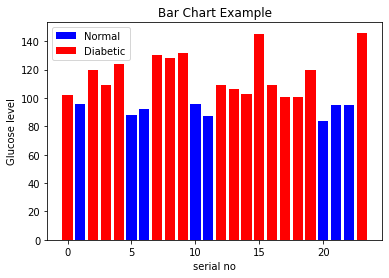

In [39]:
import matplotlib.pyplot as plt

plt.bar(c1, y1, label="Normal", color='b')                                      #graph between normal glucose level and respective index
plt.bar(c2, y2, label="Diabetic", color='r')                                    #graph between diabetic glucose level and respective index
plt.plot()                                                                      #plot to show Diabetic and Not diabetic

plt.xlabel("serial no")
plt.ylabel("Glucose level")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

In [40]:
a1=['']                      #list for age group 18 to 44
a2=['']                      #list for age group 45 to 60
a3=['']                      #list for age group 61 to 100
d1=d2=d3=0

for i in range(0,l):         #loop to run as per index
  if age[i] in range(18,45):
    a1.append(age[i])
    if d[i] == 'Diabetic':
      d1+=1
  elif age[i] in range(45, 61):
    a2.append(age[i])
    if d[i] == 'Diabetic':
      d2+=1
  else:                      # age in range(61,100):
    a3.append(age[i])
    if d[i] == 'Diabetic':
      d3+=1



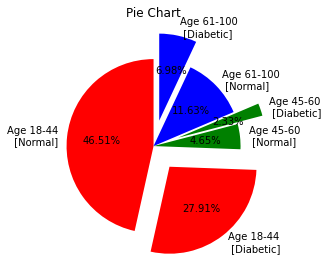

In [47]:
#Pie chart showing percentage of people in certain agegroup in terms of Diabetic and Not diabetic

import matplotlib.pyplot as plt

labels = 'Age 18-44\n [Normal]','Age 18-44\n [Diabetic]', 'Age 45-60\n [Normal]','Age 45-60\n [Diabetic]', 'Age 61-100\n [Normal]', 'Age 61-100 \n [Diabetic]'
sections = [len(a1),d1,len(a2),d2, len(a3),d3]
colors = ['r','r','g', 'g','b', 'b']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0,0.3, 0,0.3, 0,0.3),
        autopct = '%1.2f%%')
                                                             
plt.title('Pie Chart\n')
plt.show()

In [42]:
df1 = df.drop('Sr.no', axis=1)
df1.corr()                                #print Correlation between columns

,Age (Years),Blood Pressure (mmHg),Pulse Rate(per minute),Blood Glucose (mg/dL),Sensor Readings,Height,Weight,Spo2,Temp(In F)
Age (Years),1.000000,0.405390,-0.353026,0.314290,0.324622,-0.511969,-0.326512,-0.080721,0.075495
Blood Pressure (mmHg),0.405390,1.000000,0.025423,0.125347,0.534102,-0.175333,0.192662,0.119754,0.252851
Pulse Rate(per minute),-0.353026,0.025423,1.000000,-0.019791,-0.024777,0.022199,0.461095,-0.065866,-0.239121
Blood Glucose (mg/dL),0.314290,0.125347,-0.019791,1.000000,0.187703,-0.071599,-0.268845,-0.358675,0.144879
Sensor Readings,0.324622,0.534102,-0.024777,0.187703,1.000000,0.105127,-0.057487,-0.034867,0.329124
Height,-0.511969,-0.175333,0.022199,-0.071599,0.105127,1.000000,0.307859,-0.096512,0.204158
Weight,-0.326512,0.192662,0.461095,-0.268845,-0.057487,0.307859,1.000000,0.196994,-0.288173
Spo2,-0.080721,0.119754,-0.065866,-0.358675,-0.034867,-0.096512,0.196994,1.000000,-0.077508
Temp(In F),0.075495,0.252851,-0.239121,0.144879,0.329124,0.204158,-0.288173,-0.077508,1.000000


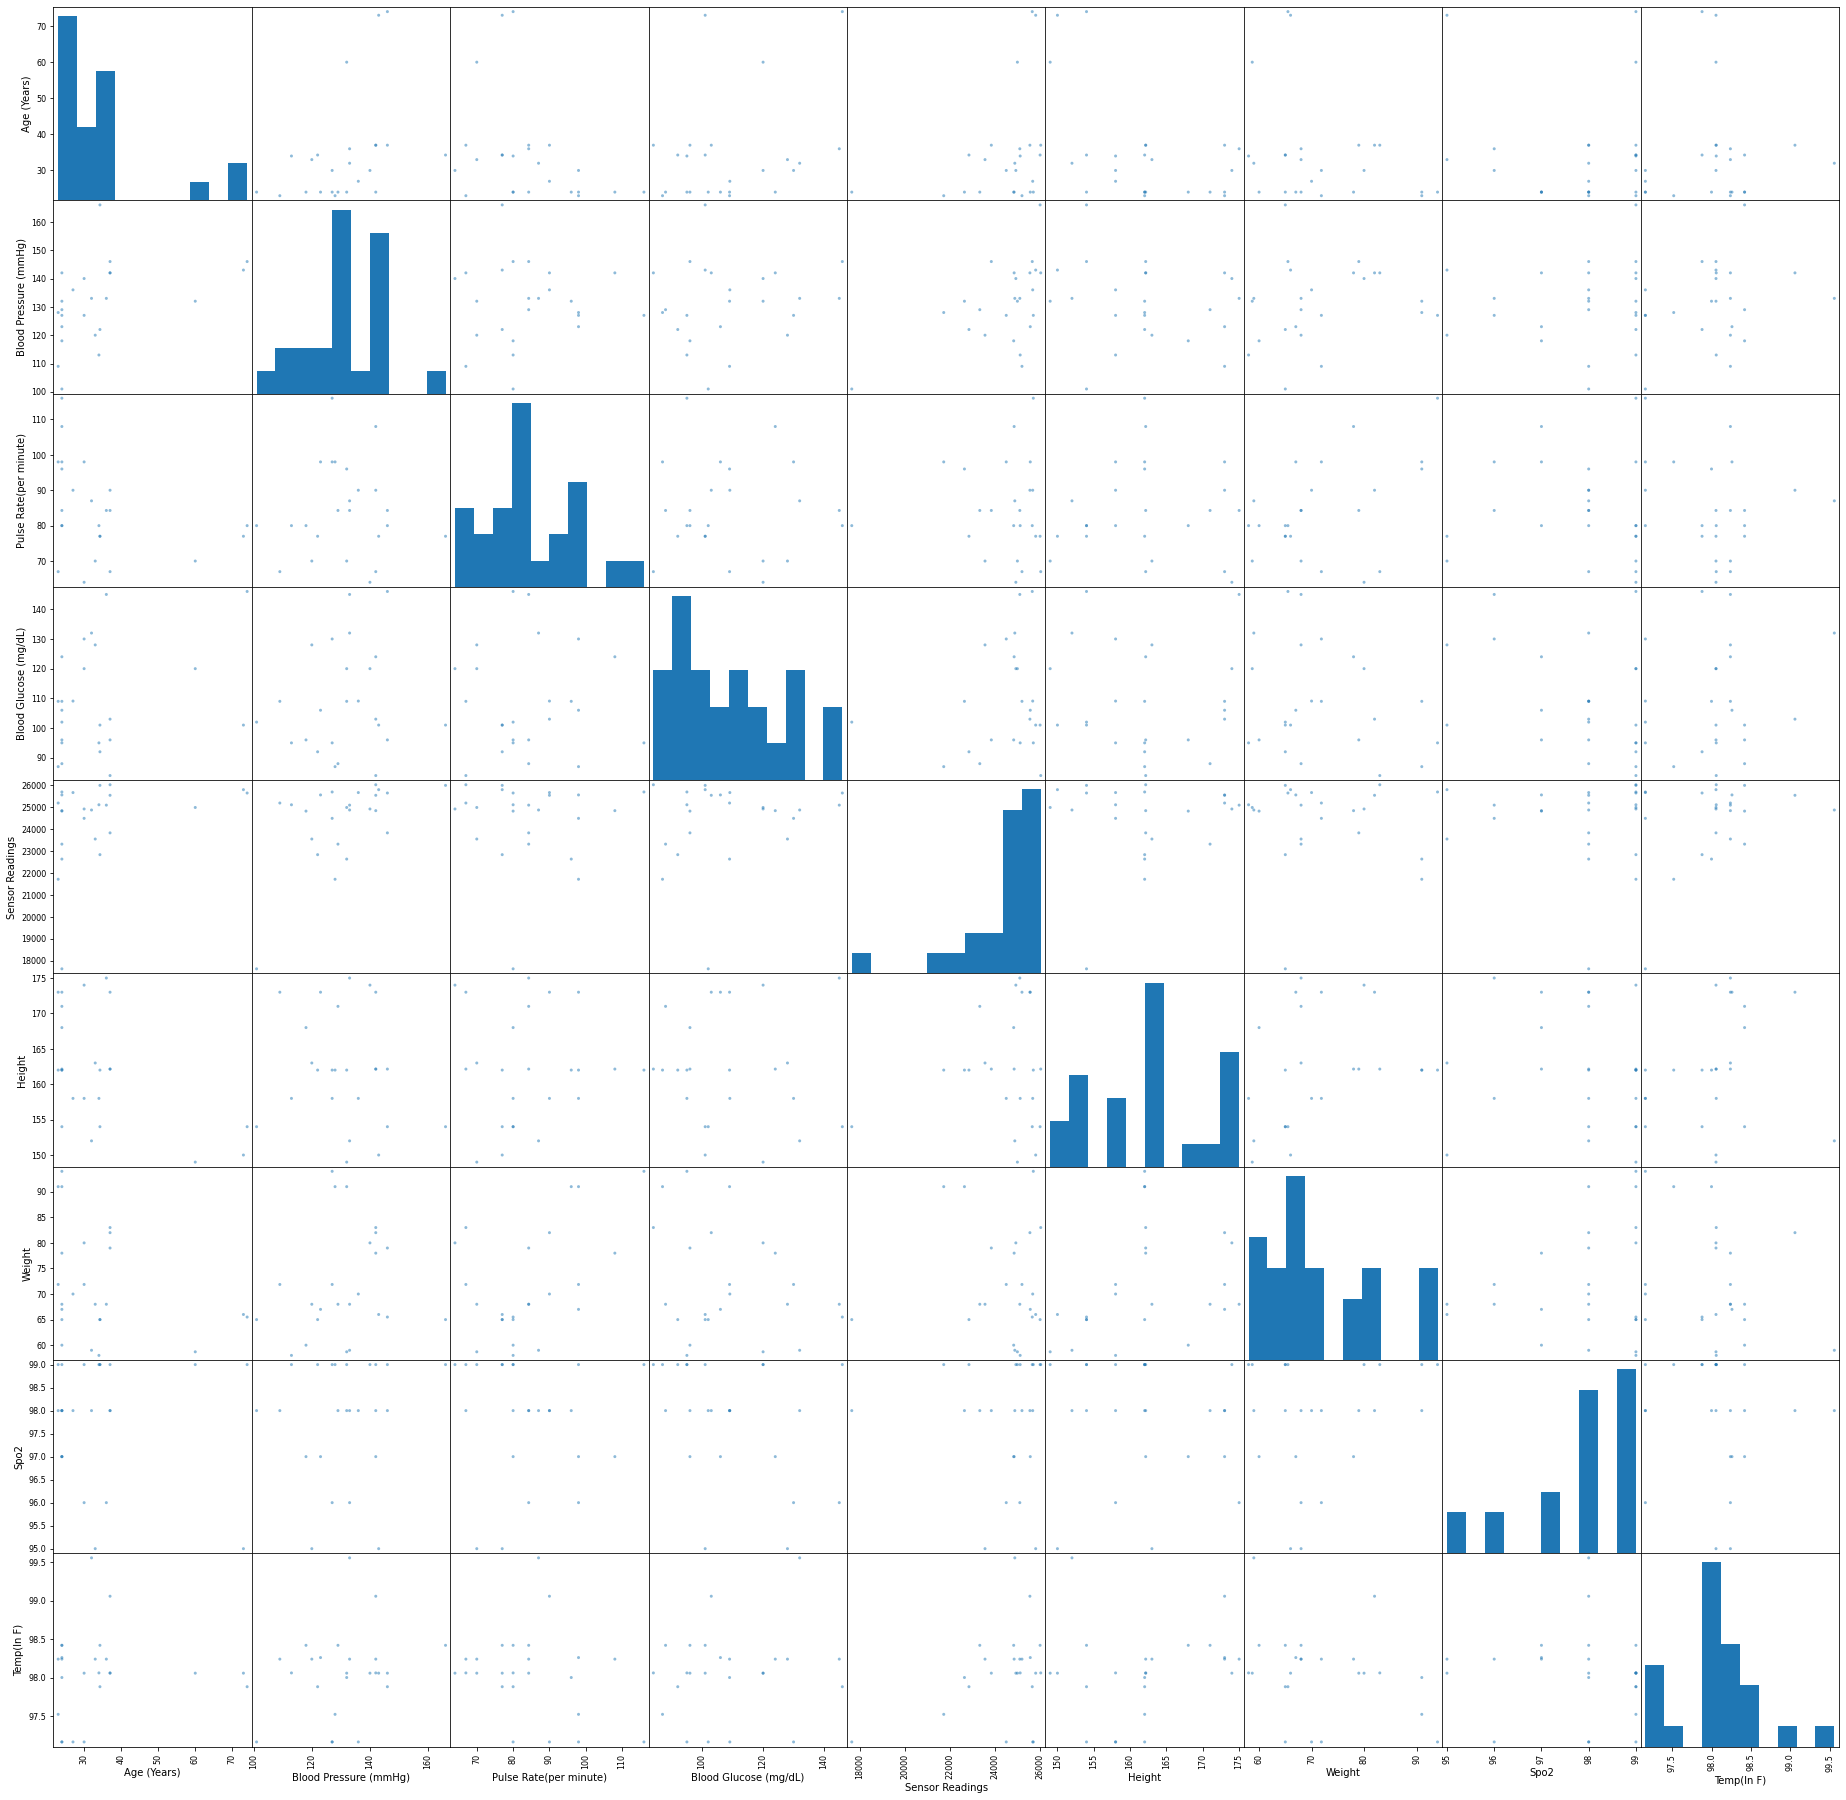

In [43]:
from pandas.plotting import scatter_matrix
a = scatter_matrix(df1, figsize=(32, 32))                                       #print scatter matrix for correlation plot

In [44]:
df1.describe()      #statiscal data using df.describe

,Age (Years),Blood Pressure (mmHg),Pulse Rate(per minute),Blood Glucose (mg/dL),Sensor Readings,Height,Weight,Spo2,Temp(In F)
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,34.272727,131.250000,84.285714,109.086957,24401.291667,162.142857,71.872727,97.833333,98.057000
std,14.527880,13.963462,13.174887,17.759047,1842.828957,7.930600,10.557881,1.274044,0.567535
min,23.000000,101.000000,64.000000,84.000000,17632.000000,149.000000,58.000000,95.000000,97.160000
25%,24.000000,122.750000,77.000000,95.750000,23754.000000,157.000000,65.000000,97.000000,97.880000
50%,31.000000,132.000000,82.142857,104.500000,24946.500000,162.000000,68.000000,98.000000,98.058500
75%,36.250000,142.000000,91.500000,121.000000,25574.000000,168.750000,79.250000,99.000000,98.245000
max,74.000000,166.000000,116.000000,146.000000,26016.000000,175.000000,94.000000,99.000000,99.560000
